# ARMA - Autoregressing Moving Average Models
$$r_t = c + \varphi_1 r_{t-1} + \theta_1 \epsilon_{t-1} + \epsilon_t$$

- $r_t, r_{t-1}$: Values in the current period and 1 period ago respectively
- $\epsilon_t, \epsilon_{t-1}$: Error terms for the same two periods
- c: Baseline constant factor
- $\varphi_1$: What part of the value last period is relevant in explaining the current one
- $\theta_1$: What part of the error last period is relevant in explaining the current value

In complex models
- $\varphi_i$: The importance of the values for the $i^{th}$ lag
- $\theta_i$: The importance of the error terms for the $i^{th}$ lag

In [1]:
import sys
sys.path.append('..')
import utils
import statsmodels.tsa.stattools as sts
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA

df, df_test = utils.get_index_2018_market_value_splits(market_name='ftse')
df['rw'] = utils.get_random_walk_data()
df.head()

../utils.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


,market_value,wn,rw
date,,,
1994-01-07,3445.98,6366.556485,1122.139662
1994-01-10,3440.58,5762.993004,1080.347860
1994-01-11,3413.77,2843.773561,1082.095245
1994-01-12,3372.02,4051.502441,1083.639265
1994-01-13,3360.01,5829.741600,1067.146255


In [2]:
df["returns"] = df.market_value.pct_change(1).mul(100)

In [3]:
import numpy as np
models = [None]
llrs = []
model_ar_x_1 = None
for i in np.arange(1, 10):
    (model_ar_x_1, llr_x) = utils.ARMA_LLR_test(df.returns[1:], model_ar_x_1, order=(i, i))
    models.append(model_ar_x_1)
    llrs.append(llr_x)
    print(f'LLR test, Lags: {i}, p-value: {llr_x}')

/Users/shankar/dev/tools/anaconda3/envs/time/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARMA(1, 1): 	LL = -7916.499900211403, 	AIC = 15840.999800422805
LLR test, Lags: 1, p-value: None
ARMA(2, 2): 	LL = -7913.222797830707, 	AIC = 15838.445595661415
LLR test, Lags: 2, p-value: 0.01
ARMA(3, 3): 	LL = -7893.514759917186, 	AIC = 15803.029519834372
LLR test, Lags: 3, p-value: 0.0
ARMA(4, 4): 	LL = -7889.155558007078, 	AIC = 15798.311116014156
LLR test, Lags: 4, p-value: 0.003
ARMA(5, 5): 	LL = -7882.160381598054, 	AIC = 15788.320763196109
LLR test, Lags: 5, p-value: 0.0


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [4]:
res = models[1].fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Thu, 17 Dec 2020   AIC                          15841.000
Time:                        19:00:29   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -13.406      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
MA.1            1.2284           +0.0000j            1.2284            0.0000
-----------------------------------------------------------------------------
"""

- A positive tendency between past and present values
- Returns move in trends of consecutive positive and negative values
- Periods of persistent increase or decreases when translated to prices

In [5]:
model_ret_ar_1 = ARMA(df.returns[1:], order=(1, 0))
model_ret_ma_1 = ARMA(df.returns[1:], order=(0, 1))

print(f'\nARMA vs AR {utils.LLR_test(model_ret_ar_1, models[1])}')
print(f'\nARMA vs MA {utils.LLR_test(model_ret_ma_1, models[1])}')

/Users/shankar/dev/tools/anaconda3/envs/time/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)



ARMA vs AR 0.0

ARMA vs MA 0.0


- Past estimators include both past values and past errors
- $residual = actual - predicted$ so $predicted = actual - residual$

## Higher Lag ARMA Models

In [6]:
model_ret_ar_3_ma_3 = models[3]
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()

In [7]:
print(f'\nARMA vs AR {utils.LLR_test(models[1], models[3], DF=4)}')


ARMA vs AR 0.0


In [8]:
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 3)   Log Likelihood               -7893.515
Method:                       css-mle   S.D. of innovations              1.166
Date:                Thu, 17 Dec 2020   AIC                          15803.030
Time:                        19:00:37   BIC                          15855.199
Sample:                    01-10-1994   HQIC                         15821.310
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.395      0.163      -0.008       0.045
ar.L1.returns    -0.1898      0.104     -1.827      0.068      -0.393       0.014
ar.L2.returns    -0.2942      0.087     -3.389      0.001      -0.464      -0.124
ar.L3.returns     0.4459      0.138      3.225      0.001       0.175       0.717
ma.L1.returns     0.1707      0.099      1.726      0.084      -0.023       0.365
ma.L2.returns     0.2277      0.084      2.701      0.007       0.062       0.393
ma.L3.returns    -0.5432      0.127     -4.270      0.000      -0.793      -0.294
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5168           -1.0283j            1.1508           -0.3241
AR.2           -0.5168           +1.0283j            1.1508            0.3241
AR.3            1.6932           -0.0000j            1.6932           -0.0000
MA.1           -0.5286           -0.9835j            1.1166           -0.3285
MA.2           -0.5286           +0.9835j            1.1166            0.3285
MA.3            1.4764           -0.0000j            1.4764           -0.0000
-----------------------------------------------------------------------------
"""

In [17]:
models = [None]
llrs = []
model_ar_x_1 = None
for i in np.arange(1, 6):
    for j in np.arange(1, 6):
        (model_ar_x_1, llr_x) = utils.ARMA_LLR_test(df.returns[1:], model_ar_x_1, order=(i, j))
        models.append(model_ar_x_1)
        llrs.append(llr_x)
        print(f'LLR test, Lags: {i, j}, {len(llrs)}, p-value: {llr_x}')

/Users/shankar/dev/tools/anaconda3/envs/time/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARMA(1, 1): 	LL = -7916.499900211403, 	AIC = 15840.999800422805
LLR test, Lags: (1, 1), 1, p-value: None
ARMA(1, 2): 	LL = -7913.670297876098, 	AIC = 15837.340595752195
LLR test, Lags: (1, 2), 2, p-value: 0.017
ARMA(1, 3): 	LL = -7896.837893752834, 	AIC = 15805.675787505668
LLR test, Lags: (1, 3), 3, p-value: 0.0
ARMA(1, 4): 	LL = -7896.593520418666, 	AIC = 15807.187040837332
LLR test, Lags: (1, 4), 4, p-value: 0.484
ARMA(1, 5): 	LL = -7890.973460209605, 	AIC = 15797.94692041921
LLR test, Lags: (1, 5), 5, p-value: 0.001
ARMA(2, 1): 	LL = -7913.456336201022, 	AIC = 15836.912672402044
LLR test, Lags: (2, 1), 6, p-value: 1.0
ARMA(2, 2): 	LL = -7913.222797830707, 	AIC = 15838.445595661415
LLR test, Lags: (2, 2), 7, p-value: 0.494
ARMA(2, 3): 	LL = -7895.587234021292, 	AIC = 15805.174468042584
LLR test, Lags: (2, 3), 8, p-value: 0.0
ARMA(2, 4): 	LL = -7895.559989843172, 	AIC = 15807.119979686344
LLR test, Lags: (2, 4), 9, p-value: 0.815
ARMA(2, 5): 	LL = -7884.6875966985235, 	AIC = 15787.37

In [10]:
utils.LLR_test(models[7], models[11])

0.042

## ARMA(3, 1)

In [11]:
ret = models[9].fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 1)   Log Likelihood               -7899.072
Method:                       css-mle   S.D. of innovations              1.167
Date:                Thu, 17 Dec 2020   AIC                          15810.144
Time:                        19:02:29   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.298      0.194      -0.010       0.047
ar.L1.returns    -0.5077      0.088     -5.769      0.000      -0.680      -0.335
ar.L2.returns    -0.0638      0.016     -4.023      0.000      -0.095      -0.033
ar.L3.returns    -0.1102      0.014     -7.850      0.000      -0.138      -0.083
ma.L1.returns     0.4839      0.088      5.500      0.000       0.311       0.656
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5095           -0.0000j            1.5095           -0.5000
AR.2            0.4653           -2.4076j            2.4521           -0.2196
AR.3            0.4653           +2.4076j            2.4521            0.2196
MA.1           -2.0668           +0.0000j            2.0668            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
utils.LLR_test(models[9], models[10])

0.01

We select a model, if
- All coefficients are significant
- Highest log-likelihood among the models with all coefficients significant
- Lowest information criteria out of the models with all coefficients significant

## Residuals for Returns

In [13]:
df['res_ret_ar_3_ma_2'] = models[10].fit().resid[1:]

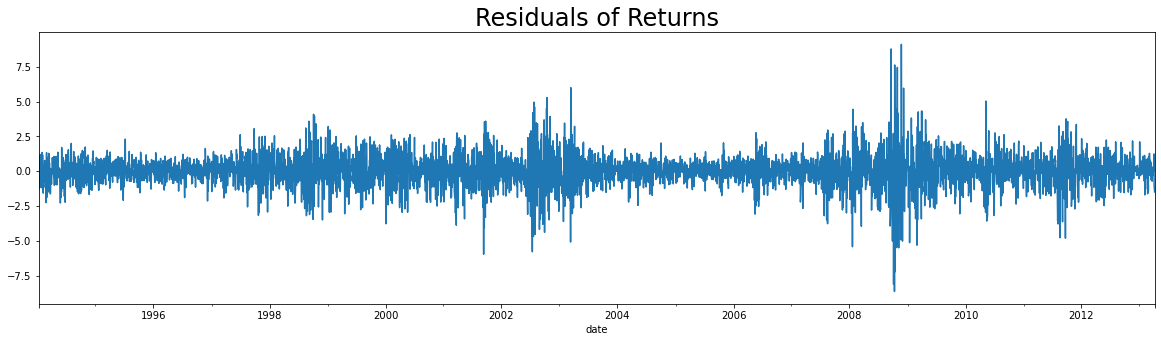

In [14]:
df.res_ret_ar_3_ma_2.plot(figsize=(20, 5))
plt.title("Residuals of Returns", size=24)
plt.show()

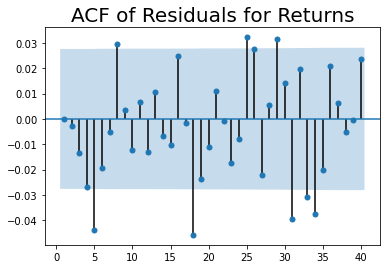

In [16]:
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:], zero=False, lags=40)
plt.title("ACF of Residuals for Returns", size=20)
plt.show()

## Revaluating Model Selection